In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
X,Y = datasets.fetch_california_housing(return_X_y=True)
X = pd.DataFrame(X,columns=['MedInc median income in block',
                            'HouseAge median house age in block',
                            'AveRooms average number of rooms',
                            'AveBedrms average number of bedrooms',
                            'Population block population',
                            'AveOccup average house occupancy',
                            'Latitude house block latitude',
                            'Longitude house block longitude'])                                                     

In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_train,Y_train,train_size=0.8)

print('train',X_train.shape,Y_train.shape)
print('cv',X_cv.shape,Y_cv.shape)
print('test',X_test.shape,Y_test.shape)


train (13209, 8) (13209,)
cv (3303, 8) (3303,)
test (4128, 8) (4128,)


In [4]:
X_train.sample(n=5)

,MedInc median income in block,HouseAge median house age in block,AveRooms average number of rooms,AveBedrms average number of bedrooms,Population block population,AveOccup average house occupancy,Latitude house block latitude,Longitude house block longitude
13313,1.4464,35.0,4.231810,1.101523,1182.0,2.000000,34.07,-117.65
7699,4.8523,36.0,5.941667,0.979167,698.0,2.908333,33.96,-118.12
5899,3.9464,37.0,4.928736,1.025287,860.0,1.977011,34.16,-118.31
2270,2.0300,38.0,4.686275,1.117647,1131.0,2.772059,36.78,-119.79
19941,2.5000,32.0,4.862857,0.994286,1016.0,2.902857,36.25,-119.46


In [5]:
# define base model (no regularization):
mse = list()
depths = [3,4,5,7]
for depth in depths:
    dt_model = DecisionTreeRegressor(min_samples_leaf=5,max_depth=depth)
    dt_model.fit(X=X_train,y=Y_train)
    mse.append(mean_squared_error(y_true=Y_cv,y_pred=dt_model.predict(X=X_cv)))

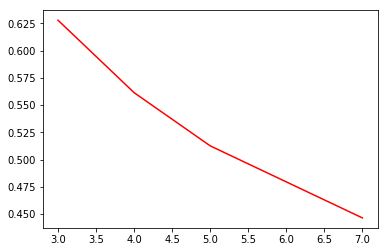

In [6]:
plt.plot(depths,mse,color='r')
plt.show()

In [7]:
best_model = DecisionTreeRegressor(min_samples_leaf=5,max_depth=7)
best_model.fit(X=X_train,y=Y_train)
error = mean_squared_error(y_true=Y_cv,y_pred=best_model.predict(X=X_cv))
print('performance:',error)

performance: 0.4463799332169963


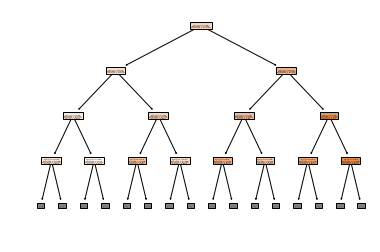

In [8]:
# Show the tree structure
plot_tree(best_model,filled=True,proportion=True,max_depth=3)
plt.show()


In [9]:
model_best_features = X.columns.values[[j for i,j in sorted([(j,i) for i,j in list(enumerate(best_model.feature_importances_))],reverse=True)[0:3]]]
model_best_features

array(['MedInc median income in block',
       'AveOccup average house occupancy',
       'Latitude house block latitude'], dtype=object)

In [10]:
top_3_features = SelectKBest(score_func=f_regression,k=3)
top_3_features.fit_transform(X=X,y=Y)
stats_best_features = X.columns.values[top_3_features.get_support()]
stats_best_features

array(['MedInc median income in block',
       'AveRooms average number of rooms',
       'Latitude house block latitude'], dtype=object)

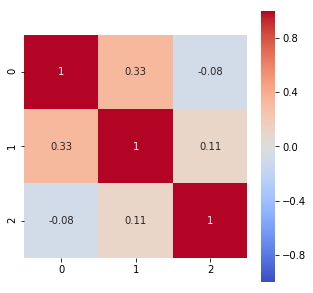

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(np.corrcoef(x=np.transpose(X.loc[:,X.columns.values[top_3_features.get_support()]])),annot=True,square=True,cmap='coolwarm',vmin=-1,vmax=1);
plt.show()


In [13]:
top = list(set(model_best_features).intersection(set(stats_best_features)))
top

['Latitude house block latitude', 'MedInc median income in block']

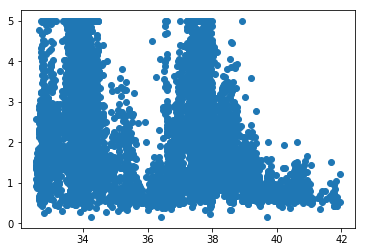

In [14]:
plt.scatter(x=X_train[top[0]],y=Y_train)
plt.show()


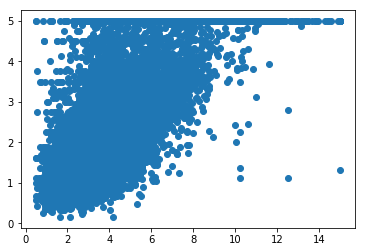

In [15]:
plt.scatter(x=X_train[top[1]],y=Y_train)
plt.show()
